## Assignement 1

#### workspace setup and importing data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import scipy.stats as stat
%matplotlib inline
orig = pd.read_csv('PSID.csv')

orig.describe()

Seq No       intnum      persnum          age      educatn  \
count  4856.000000  4856.000000  4856.000000  4856.000000  4855.000000   
mean   2428.500000  4598.101318    59.213550    38.462932    16.377137   
std    1401.950784  2761.971174    79.748556     5.595116    18.449502   
min       1.000000     4.000000     1.000000    30.000000     0.000000   
25%    1214.750000  1905.000000     2.000000    34.000000    12.000000   
50%    2428.500000  5464.000000     4.000000    38.000000    12.000000   
75%    3642.250000  6655.000000   170.000000    43.000000    14.000000   
max    4856.000000  9306.000000   205.000000    50.000000    99.000000   

            earnings        hours         kids  
count    4856.000000  4856.000000  4856.000000  
mean    14244.506178  1235.334843     4.481260  
std     15985.447449   947.175837    14.887856  
min         0.000000     0.000000     0.000000  
25%        85.000000    32.000000     1.000000  
50%     11000.000000  1517.000000     2.000000  
75%     22000.000000  2000.000000     3.000000  
max    240000.000000  5160.000000    99.000000

In [2]:
orig.shape

(4856, 9)

### Visualizations

#### Age

Text(0.5, 0, 'Age')

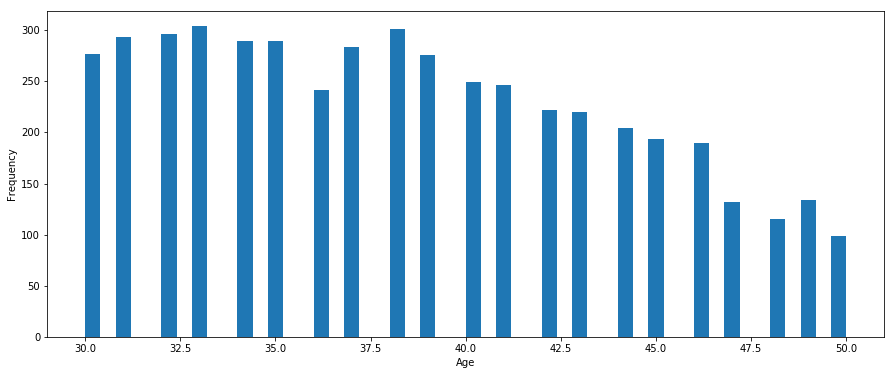

In [3]:
orig['age'].plot(kind = 'hist',bins=50,figsize=(15,6))
plt.xlabel('Age')

##### Box plot

Text(0.5, 0, 'Age')

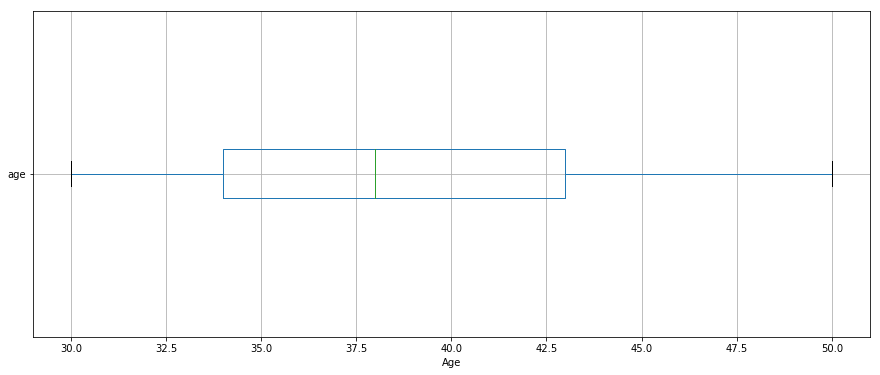

In [4]:
orig.boxplot(column=['age'],return_type=None,vert=False,figsize=(15,6))
plt.xlabel('Age')

#### Education

Text(0.5, 0, 'Education')

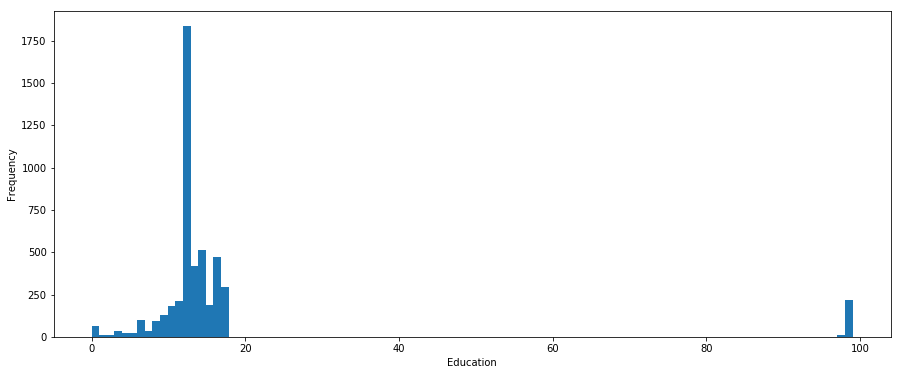

In [5]:
orig['educatn'].plot(kind='hist',bins=100,figsize=(15,6))
plt.xlabel('Education')

##### Box plot

Text(0.5, 0, 'Education level')

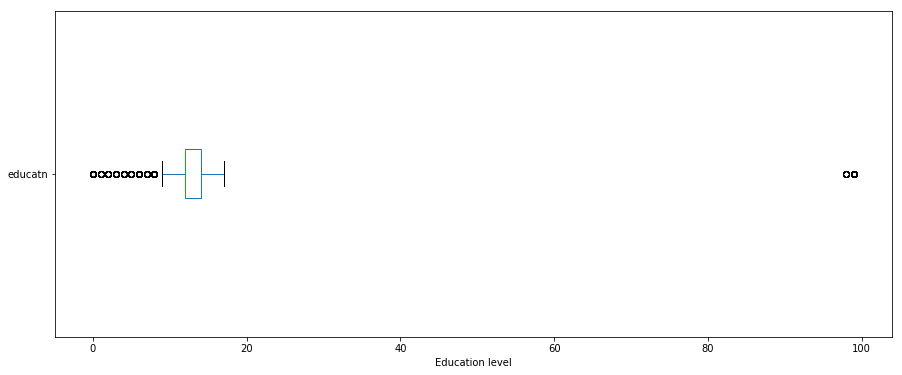

In [6]:
orig.boxplot(column=['educatn'],grid=False,return_type=None,vert=False,figsize=(15,6))
plt.xlabel('Education level')

> Note : `outliers`  found from original sample for education level

#### Earnings

Text(0.5, 0, 'Earnings')

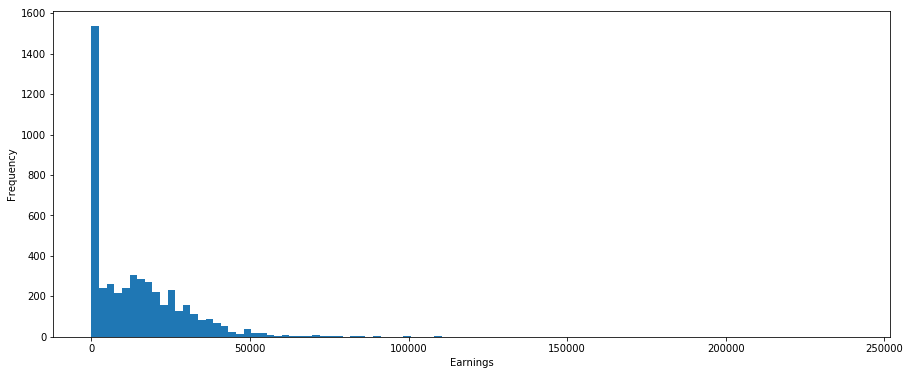

In [7]:
orig['earnings'].plot(kind='hist',bins=100,figsize=(15,6))
plt.xlabel('Earnings')

##### Box plot

Text(0.5, 0, 'Earnings in USD')

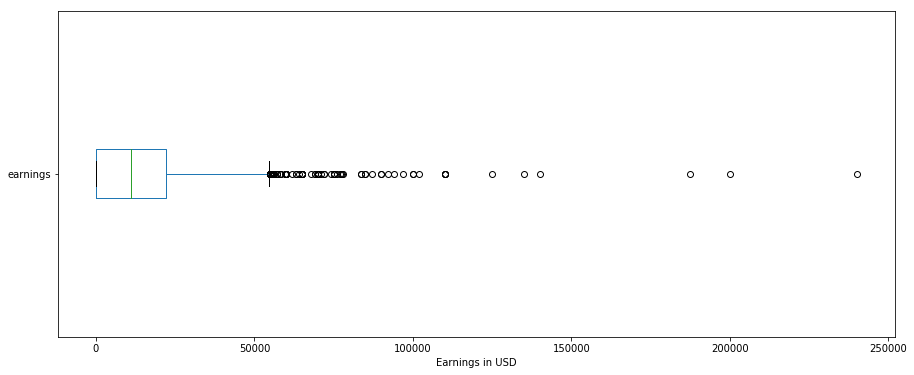

In [8]:
orig.boxplot(column=['earnings'],grid=False,return_type=None,vert=False,figsize=(15,6))
plt.xlabel('Earnings in USD')

#### Number of kids

Text(0.5, 0, 'Kids')

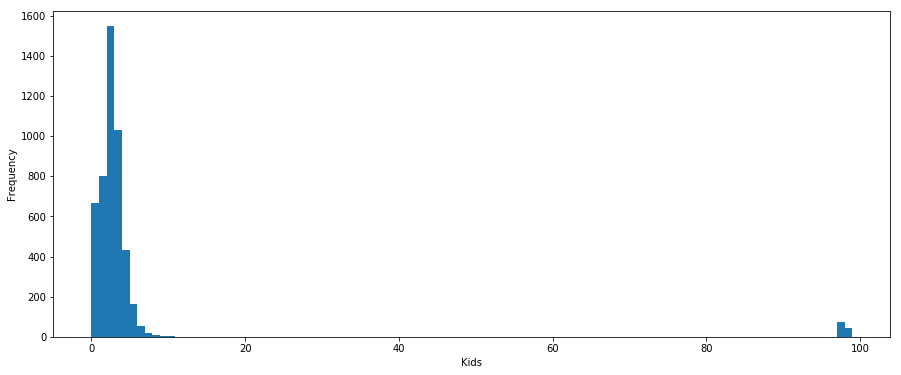

In [9]:
orig['kids'].plot(kind='hist',bins=100,figsize=(15,6))
plt.xlabel('Kids')

##### Box plot

Text(0.5, 0, 'Number of kids')

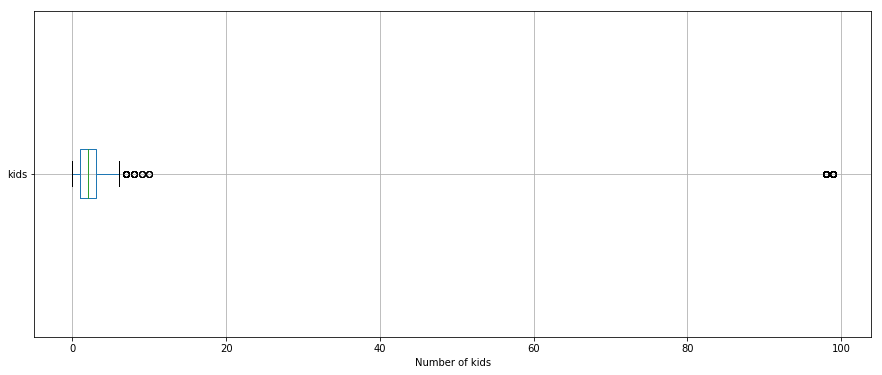

In [10]:
orig.boxplot(column=['kids'],return_type=None,vert=False,figsize=(15,6))
plt.xlabel('Number of kids')

> Note: `outliers` found near 100 from original sample for kids possibly due to incorrectly measured data

#### Martial status

Text(0, 0.5, 'Count')

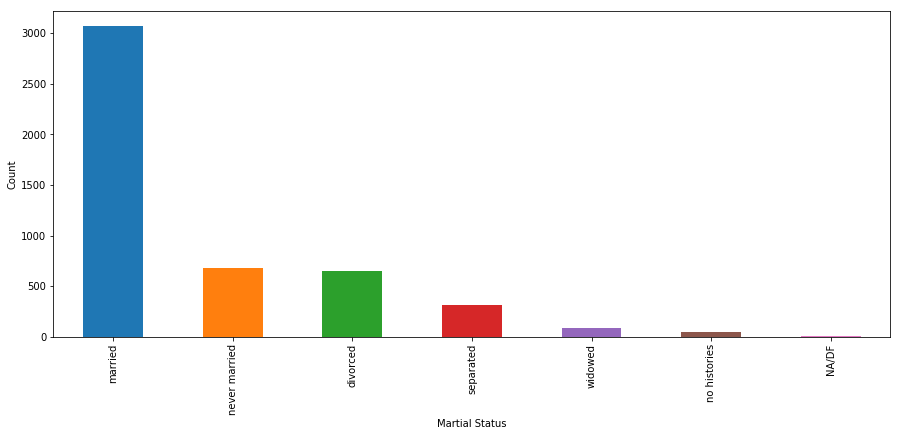

In [11]:
married = orig['married'].value_counts()
married.plot(kind='bar',figsize=(15,6))
plt.xlabel('Martial Status')
plt.ylabel('Count')



#### Removing Invalid data

##### 1.considering the number of kids

Text(0.5, 0, 'Number of kids')

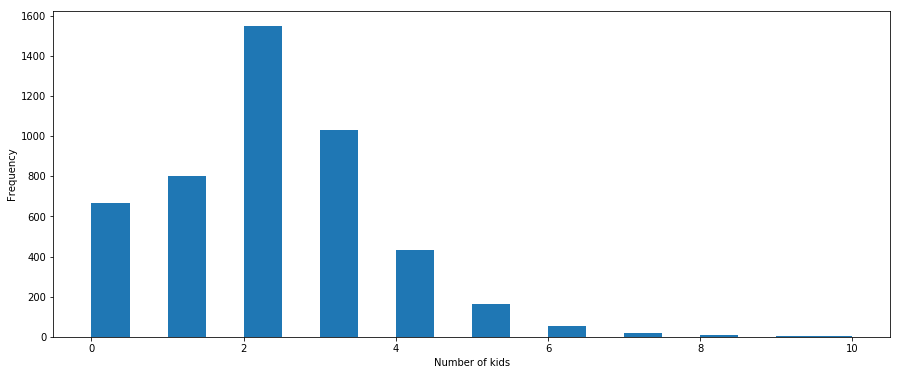

In [12]:
orig = orig.drop(orig[orig.kids > 20].index)
orig['kids'].plot(kind='hist', bins=20,figsize=(15,6))
plt.xlabel('Number of kids')

##### 2.considering the earnings

assumption:
  - removing entries above earnings of USD 150,000 does not effect the overall statistics


Text(0.5, 0, 'Earnings')

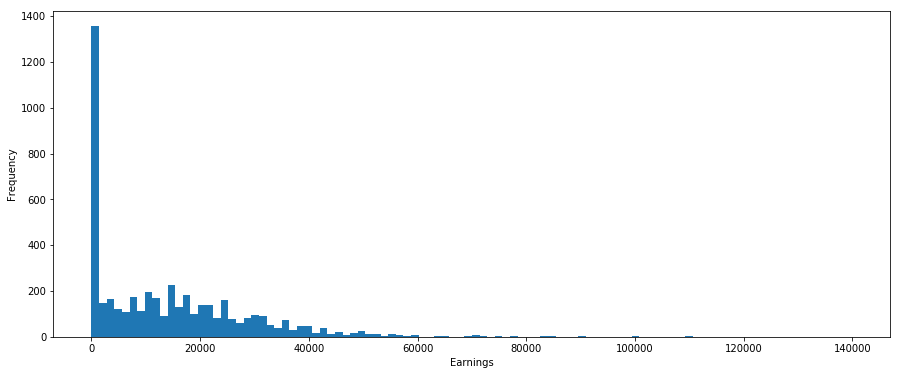

In [13]:
orig = orig.drop(orig[orig.earnings > 150000].index)
orig['earnings'].plot(kind='hist', bins=100,figsize=(15,6))
plt.xlabel('Earnings')

##### 3.considering the education level

assumption:
 - removing entries above education level 20 has minimum effect on overall statistics

Text(0.5, 0, 'Education')

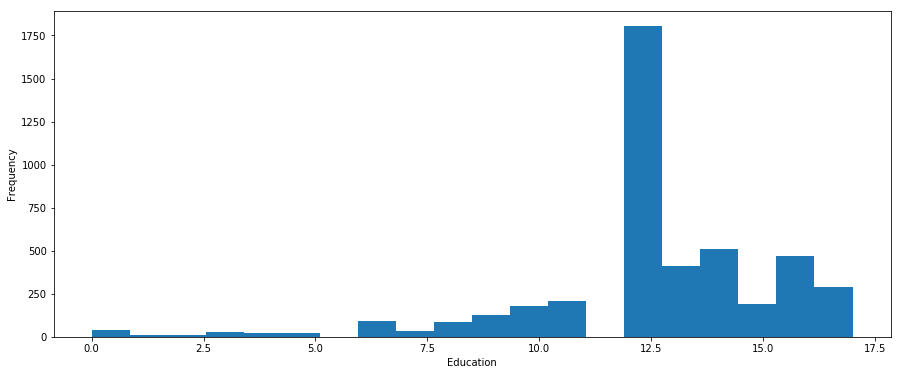

In [14]:
orig = orig.drop(orig[orig.educatn > 20].index)
orig['educatn'].plot(kind='hist', bins=20,figsize=(15,6))
plt.xlabel('Education')

#### Relations between data

/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'Martial status')

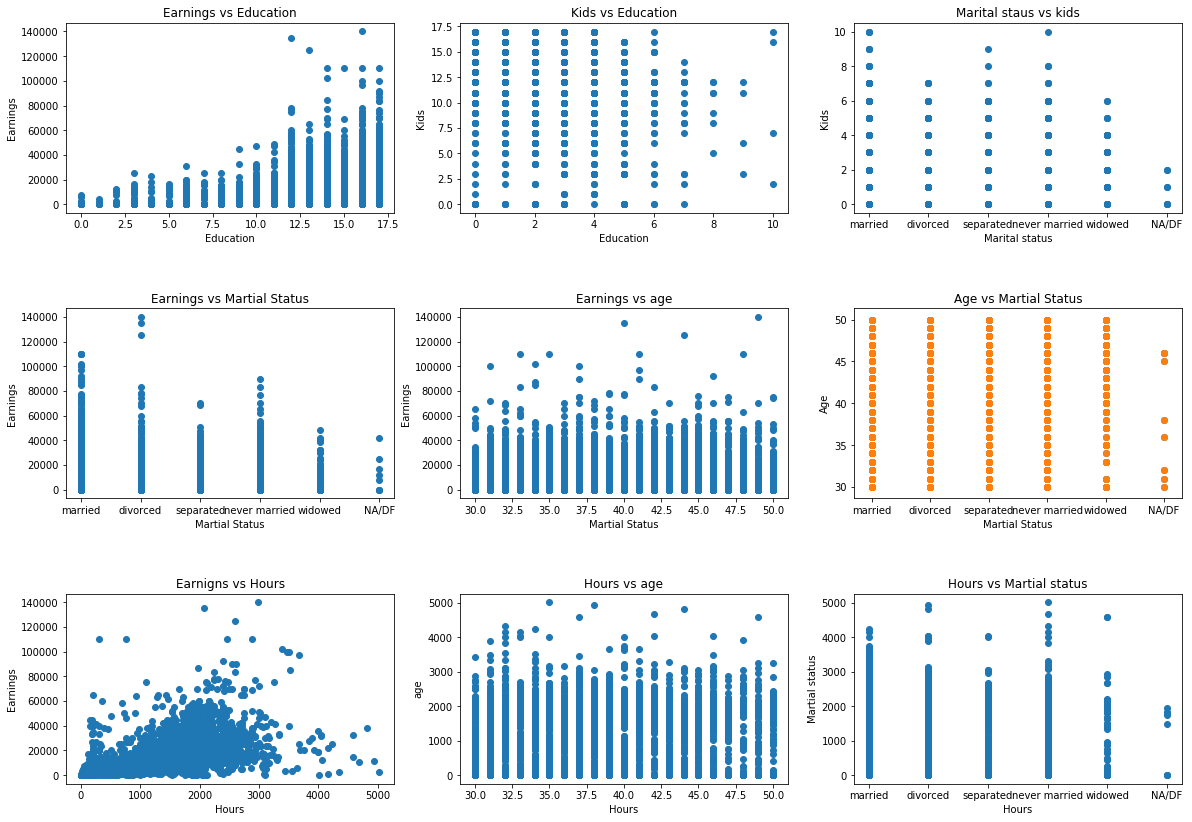

In [15]:
plt.figure(figsize=(20, 14))
plt.subplots_adjust(hspace=0.5)


plt.subplot(3,3,1)
plt.scatter(orig['educatn'], orig['earnings'])
plt.title('Earnings vs Education')
plt.xlabel("Education")
plt.ylabel("Earnings")

plt.subplot(3,3,2)
plt.scatter(orig['kids'], orig['educatn'])
plt.title('Kids vs Education')
plt.xlabel("Education")
plt.ylabel("Kids")

plt.subplot(3,3,3)
plt.scatter(orig['married'], orig['kids'])
plt.title('Marital staus vs kids')
plt.xlabel("Marital status")
plt.ylabel("Kids")


plt.subplot(3,3,4)
plt.scatter(orig['married'], orig['earnings'])
plt.title('Earnings vs Martial Status')
plt.xlabel("Martial Status")
plt.ylabel("Earnings")

plt.subplot(3,3,5)
plt.scatter(orig['age'], orig['earnings'])
plt.title('Earnings vs age')
plt.xlabel("Martial Status")
plt.ylabel("Earnings")

plt.subplot(3,3,6)
plt.scatter(orig['married'], orig['age'])
plt.title('Age vs Martial Status')
plt.xlabel("Martial Status")
plt.ylabel("Age")

plt.subplot(3,3,6)
plt.scatter(orig['married'], orig['age'])
plt.title('Age vs Martial Status')
plt.xlabel("Martial Status")
plt.ylabel("Age")

plt.subplot(3,3,7)
plt.scatter(orig['hours'], orig['earnings'])
plt.title('Earnigns vs Hours')
plt.xlabel("Hours")
plt.ylabel("Earnings")


plt.subplot(3,3,8)
plt.scatter(orig['age'], orig['hours'])
plt.title('Hours vs age')
plt.xlabel("Hours")
plt.ylabel("age")


plt.subplot(3,3,9)
plt.scatter(orig['married'], orig['hours'])
plt.title('Hours vs Martial status')
plt.xlabel("Hours")
plt.ylabel("Martial status")

In [14]:
# understand the correlation using spearman correlation coefficiant 
orig.corr(method="spearman")

Seq No    intnum   persnum       age   educatn  earnings  \
Seq No    1.000000  1.000000 -0.384426 -0.016184 -0.266457 -0.197602   
intnum    1.000000  1.000000 -0.384657 -0.016090 -0.266470 -0.197587   
persnum  -0.384426 -0.384657  1.000000 -0.257953  0.161101  0.060876   
age      -0.016184 -0.016090 -0.257953  1.000000 -0.026466  0.076098   
educatn  -0.266457 -0.266470  0.161101 -0.026466  1.000000  0.355134   
earnings -0.197602 -0.197587  0.060876  0.076098  0.355134  1.000000   
hours    -0.118188 -0.118169  0.042910  0.046605  0.174441  0.793336   
kids      0.143375  0.143387 -0.112442  0.155847 -0.265205 -0.260386   

             hours      kids  
Seq No   -0.118188  0.143375  
intnum   -0.118169  0.143387  
persnum   0.042910 -0.112442  
age       0.046605  0.155847  
educatn   0.174441 -0.265205  
earnings  0.793336 -0.260386  
hours     1.000000 -0.188060  
kids     -0.188060  1.000000

In [12]:
# we can see the highest correlation value is between earnings and hours, 
# but our hyphothesis between earnings and education that has the the second highest value.

In [17]:
earningMedian = orig.earnings.median()
print(earningM)

highEarning = orig[orig.earnings > earningMedian].educatn
print("High earning count =", highEarning.count())

lowEarning = orig[orig.earnings < earningMedian].educatn
print("Low earning count =", lowEarning.count())

11000.0
High earning count = 2389
Low earning count = 2410


NameError: name 'Hours_of_low_salary' is not defined

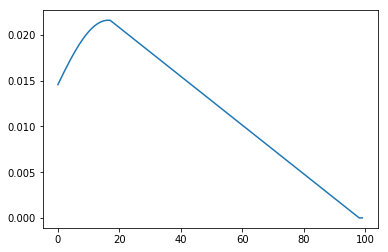

In [23]:
sortPopulation = orig['educatn'].sort_values();
populationEducatn = stat.norm.pdf(sortPopulation, sortPopulation.mean(), sortPopulation.std())
plt.plot(sortPopulation, populationEducatn, label='Education')

#educatnDataNormal = stat.norm.pdf(highEarning, highEarning.mean(), highEarning.std())
#plt.plot(highEarning, educatnDataNormal, label='High earning population')

hour_data_fit2 = stat.norm.pdf(Hours_of_low_salary, Hours_of_low_salary.mean(), Hours_of_low_salary.std())
plt.plot(Hours_of_low_salary, hour_data_fit2, label='Low earnings Sample')

plt.title('Distribution of hours people work')
plt.xlabel('Hours work')
plt.ylabel('pdf')
plt.legend()